# INTRODUCTION
Ce notebook se concentre sur l'application pratique  des concepts du Machine Learning. À travers l'analyse de nos données, nous allons illustrer les étapes essentielles pour exploiter le machine learning, depuis le chargement et l'exploration des données jusqu'à la modélisation et l'évaluation des résultats.

L'objectif est de fournir une compréhension approfondie des principes fondamentaux tout en démontrant leur application concrète à des jeux de données réels. Cela permettra de construire des modèles capables de fournir des prédictions ou des analyses utiles, tout en mettant en évidence les défis et meilleures pratiques dans ce domaine.



# PRODUITS

## Chargement des données
Le fichier Excel est chargé dans un DataFrame Pandas à l’aide de la commande pd.read_excel. Ensuite, les premières lignes du jeu de données sont affichées pour vérifier son contenu et sa structure pour assurer que les données sont correctement importées et de repérer les colonnes disponibles.

In [167]:
import pandas as pd
# Charger les données
data = pd.read_excel('C:\\Users\\PE\\Desktop\\machine learning\\tesdt1.xlsx')

# Afficher les premières lignes des données
print(data.head())

  NameProduct Name Territory ContryRegionCode       DATE ProductNumber  \
0     Helmets      Southeast               US 2011-10-01     HL-U509-R   
1     Helmets      Southeast               US 2011-08-31     HL-U509-R   
2     Helmets      Southwest               US 2012-01-01     HL-U509-R   
3     Helmets      Northeast               US 2011-08-31     HL-U509-R   
4     Helmets         Canada               CA 2012-01-01     HL-U509-R   

   StandardCost  ListPrice  Weight  Qty Name_category  
0       13.0863      34.99    -1.0   10   Accessories  
1       13.0863      34.99    -1.0   11   Accessories  
2       13.0863      34.99    -1.0    1   Accessories  
3       13.0863      34.99    -1.0    1   Accessories  
4       13.0863      34.99    -1.0   13   Accessories  


## Préparation des données
Pour garantir que les données soient prêtes à être utilisées dans un modèle de machine learning, plusieurs étapes de nettoyage et de transformation sont réalisées :
Gestion des valeurs manquantes : Les valeurs manquantes dans le DataFrame sont remplacées par la moyenne des colonnes correspondantes. Cela évite que des données manquantes empêchent l’entraînement du modèle.

In [164]:
# Vérifier les données manquantes
print(data.isnull().sum())

StandardCost    0
ListPrice       0
Weight          0
Qty             0
dtype: int64


In [165]:
# Remplacer les valeurs manquantes par la moyenne
data = data.fillna(data.mean())

In [166]:
# Résumé statistique des colonnes numériques
print(data.describe())

       StandardCost    ListPrice       Weight          Qty
count   3989.000000  3989.000000  3989.000000  3989.000000
mean    1221.542899  2059.465944    13.194741     4.608925
std      862.233408  1452.684638     7.659678     5.633533
min        3.396300     8.990000    -1.000000     1.000000
25%      486.706600   782.990000     2.840000     1.000000
50%      884.708300  1457.990000    14.680000     2.000000
75%     2171.294200  3578.270000    19.790000     6.000000
max     2171.294200  3578.270000    21.420000    54.000000


## Prediction de produit en fomction des autres caractéristiques
Le code implémente un modèle d'apprentissage automatique basé sur un Random Forest Classifier pour prédire des produits à partir d'un ensemble de données contenant des caractéristiques comme le prix (ListPrice) et le territoire (Name Territory). Les données sont chargées depuis un fichier Excel et préparées en séparant les caractéristiques (X) de la cible (y), avec encodage des variables catégorielles pour une utilisation avec le modèle. Après séparation en ensembles d'entraînement et de test, le modèle est entraîné et évalué à l'aide de la précision. Les prédictions du modèle sont ajoutées au DataFrame original, puis exportées dans un nouveau fichier Excel. Enfin, le code prévoit la prédiction sur de nouvelles données en utilisant les mêmes caractéristiques que l'ensemble d'entraînement.

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger les données
data = pd.read_excel('C:\\Users\\PE\\Desktop\\machine learning\\tesdt1.xlsx')

df = pd.DataFrame(data)

# Préparation des données
X = df[['ListPrice', 'Name Territory']]
y = df['NameProduct']

# Encodage des variables catégorielles
X['Name Territory'] = LabelEncoder().fit_transform(X['Name Territory'])

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choix du modèle
model = RandomForestClassifier()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Ajouter la colonne de prédictions au DataFrame 'df'
df['PredictedProduct'] = model.predict(X)

# Sauvegarder le DataFrame dans un fichier Excel
output_file = 'predicted_data.xlsx'
df.to_excel(output_file, index=False)

# Confirmer que le fichier a été créé
print(f"Les résultats ont été sauvegardés dans le fichier : {output_file}")

# Prédiction pour de nouvelles données
new_data = pd.DataFrame({
    'ListPrice': [34.99],
    'Name Territory': [LabelEncoder().fit(['Southeast', 'Southwest', 'Northeast', 'Canada']).transform(['Southeast'])[0]]
})

predicted_product = model.predict(new_data)
print(f'Produit prédit pour les données nouvelles: {predicted_product[0]}')


C:\Users\PE\AppData\Local\Temp\ipykernel_31720\2983191701.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Name Territory'] = LabelEncoder().fit_transform(X['Name Territory'])


Accuracy: 99.87%
Les résultats ont été sauvegardés dans le fichier : predicted_data.xlsx
Produit prédit pour les données nouvelles: Helmets


## Prédiction de Quantités à l'Aide de Random Forest Regressor 
Le script effectue une régression sur des données à l'aide d'un **Random Forest Regressor** pour prédire la quantité (**Qty**) en fonction de caractéristiques comme le prix (**ListPrice**) et le territoire (**Name Territory**). Il inclut un traitement des données manquantes, un encodage des variables catégorielles, et une recherche des meilleurs hyperparamètres via **GridSearchCV**. Après avoir trouvé les meilleurs paramètres, le modèle est ajusté sur les données d'entraînement et testé sur des données de test pour évaluer ses performances.

Enfin, une prédiction est réalisée sur une nouvelle entrée, où un prix de liste et un territoire sont fournis. 

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données (assurez-vous d'avoir la colonne DATE)
data = pd.read_excel('C:\\Users\\PE\\Desktop\\machine learning\\tesdt1.xlsx')

# Vérification de la structure des données
df = pd.DataFrame(data)
# Traitement des données manquantes pour 'ListPrice'
imputer = SimpleImputer(strategy='mean')
df['ListPrice'] = imputer.fit_transform(df[['ListPrice']])

# Encodage de la variable catégorielle 'Name Territory'
le = LabelEncoder()

# Encoder uniquement si les classes n'ont pas déjà été définies
if df['Name Territory'].isnull().any():
    df['Name Territory'] = df['Name Territory'].fillna('Unknown')  # Remplacer les valeurs manquantes par 'Unknown'
    
le.fit(df['Name Territory'])  # Fit sur les données d'entraînement

df['Name Territory'] = le.transform(df['Name Territory'])

# Diviser les données en ensembles d'entraînement et de test
X = df[['ListPrice', 'Name Territory']]
y = df['Qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les hyperparamètres à tester pour le modèle RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utiliser GridSearchCV pour optimiser les hyperparamètres
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés par GridSearchCV
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraîner le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Prédire sur les données de test
y_pred_test = best_model.predict(X_test)
# Prédiction pour une nouvelle donnée
listprice = 34.99  # Exemple de prix de liste
territory_name = 'Canada'  # Exemple de territoire

# Vérifier si le territoire 'Southeast' existe déjà dans les classes d'encodage
if territory_name in le.classes_:
    territory_encoded = le.transform([territory_name])[0]
else:
    # Si le territoire n'a pas été vu auparavant, l'ajouter aux classes et l'encoder
    territory_encoded = len(le.classes_)
    le.classes_ = np.append(le.classes_, territory_name)

# Créer une nouvelle ligne de données pour la prédiction
new_data = pd.DataFrame({
    'ListPrice': [listprice],
    'Name Territory': [territory_encoded]
})

# Prédire la quantité pour cette nouvelle donnée
predicted_qty = best_model.predict(new_data)
print(f"La quantité prédite pour le ListPrice de {listprice} et le territoire {territory_name} est : {predicted_qty[0]}")


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
La quantité prédite pour le ListPrice de 34.99 et le territoire Canada est : 11.438975705458557


# VENDEURS & REVENUE
Passons maintenant à l'analyse des performances des vendeurs, une étape cruciale pour évaluer l’impact individuel de chaque membre de l’équipe commerciale sur les revenus globaux. Ce tableau joue un rôle central en permettant de suivre les tendances de vente par vendeur, d’identifier les meilleurs contributeurs et de repérer les opportunités d’amélioration. En fournissant une vue détaillée des performances individuelles et prévisionnelles, il devient un outil clé pour la prise de décision stratégique, qu’il s’agisse d’optimiser les ressources, d’ajuster les objectifs ou de mettre en place des actions ciblées pour motiver et renforcer l’efficacité de l’équipe.

## Chargement des données :
Les données sont importées depuis un fichier Excel (pd.read_excel).
Le fichier contient des informations telles que SalePersonKey, Revenue, DATE, et d'autres colonnes pertinentes.


In [2]:
import pandas as pd
# Charger les données
file_path = r"C:\Users\PE\Desktop\machine learning\tesss4.xlsx"
data = pd.read_excel(file_path)

# Afficher les premières lignes
print("Premières lignes du dataset:")
print(data.head())

Premières lignes du dataset:
   SalePersonKey   Revenue  NumberOrder       DATE         FullName Gender  \
0              1   2417.47            1 2011-10-01  Stephen Y Jiang      M   
1              1  90167.33            1 2012-10-30  Stephen Y Jiang      M   
2              1  33206.02            1 2012-08-30  Stephen Y Jiang      M   
3              1  29638.27            1 2012-08-30  Stephen Y Jiang      M   
4              1  17990.96            1 2013-06-30  Stephen Y Jiang      M   

    HireDate       Name ContryRegionCode  
0 2011-01-04  Southeast               US  
1 2011-01-04  Southeast               US  
2 2011-01-04  Southwest               US  
3 2011-01-04  Northeast               US  
4 2011-01-04     Canada               CA  


## Exploration initiale :
Aperçu des données :
Les premières lignes sont affichées pour comprendre la structure, les types de colonnes, et obtenir un aperçu général des données.
Informations générales :
Affichage des types de données (numériques, textuelles, etc.), du nombre de valeurs non nulles, et de la mémoire utilisée.

In [3]:
# Informations générales sur le dataset
print("\nInformations sur le dataset:")
print(data.info())


Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalePersonKey     452 non-null    int64         
 1   Revenue           452 non-null    float64       
 2   NumberOrder       452 non-null    int64         
 3   DATE              452 non-null    datetime64[ns]
 4   FullName          452 non-null    object        
 5   Gender            452 non-null    object        
 6   HireDate          452 non-null    datetime64[ns]
 7   Name              452 non-null    object        
 8   ContryRegionCode  452 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 31.9+ KB
None


In [4]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes dans le dataset:")
print(data.isnull().sum())


Valeurs manquantes dans le dataset:
SalePersonKey       0
Revenue             0
NumberOrder         0
DATE                0
FullName            0
Gender              0
HireDate            0
Name                0
ContryRegionCode    0
dtype: int64


In [5]:
# Vérifier les doublons
print("\nNombre de doublons dans le dataset:")
print(data.duplicated().sum())


Nombre de doublons dans le dataset:
0


## Analyse descriptive :
Statistiques des colonnes numériques :
Génération de statistiques descriptives (moyenne, écart-type, minimum, maximum) pour les colonnes numériques, offrant une vue d'ensemble des distributions et des plages de valeurs.

In [6]:
# Résumé statistique des colonnes numériques
print("\nStatistiques descriptives des colonnes numériques:")
print(data.describe())


Statistiques descriptives des colonnes numériques:
       SalePersonKey        Revenue  NumberOrder  \
count     452.000000     452.000000   452.000000   
mean        6.053097  127526.466969     5.033186   
min         1.000000      22.930000     1.000000   
25%         3.000000   35261.642500     1.000000   
50%         5.000000   96063.280000     4.000000   
75%         8.000000  187211.722500     7.000000   
max        16.000000  779610.180000    20.000000   
std         3.948877  120240.984449     4.152445   

                                DATE                       HireDate  
count                            452                            452  
mean   2012-07-20 19:32:23.362831872  2011-07-10 07:38:45.663716864  
min              2011-05-31 00:00:00            2011-01-04 00:00:00  
25%              2012-01-22 00:00:00            2011-05-31 00:00:00  
50%              2012-07-31 00:00:00            2011-05-31 00:00:00  
75%              2013-01-28 00:00:00            2011-05-31 

## Analyse et Prévision des Revenus 
Le code réalise une analyse de séries temporelles des revenus annuels à l'aide de la bibliothèque **Prophet**, une méthode puissante pour les prévisions. Après avoir chargé les données depuis un fichier Excel, il les prépare en convertissant les colonnes de dates et de revenus et en supprimant les lignes avec des valeurs manquantes. Les revenus sont ensuite agrégés par année, fournissant une vue d'ensemble claire des tendances historiques. Le modèle Prophet est ensuite entraîné sur ces données pour prédire les revenus pour les cinq prochaines années. Les résultats, comprenant les prévisions et les valeurs réelles, sont sauvegardés dans un fichier Excel et visualisés sous forme de graphique.

Cette demarche est cruciale pour l'analyse des données, car il permet de comprendre les tendances passées et de prévoir les évolutions futures, offrant ainsi un outil précieux pour la prise de décisions stratégiques et l'optimisation des ressources.

14:57:15 - cmdstanpy - INFO - Chain [1] start processing
14:57:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\PE\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


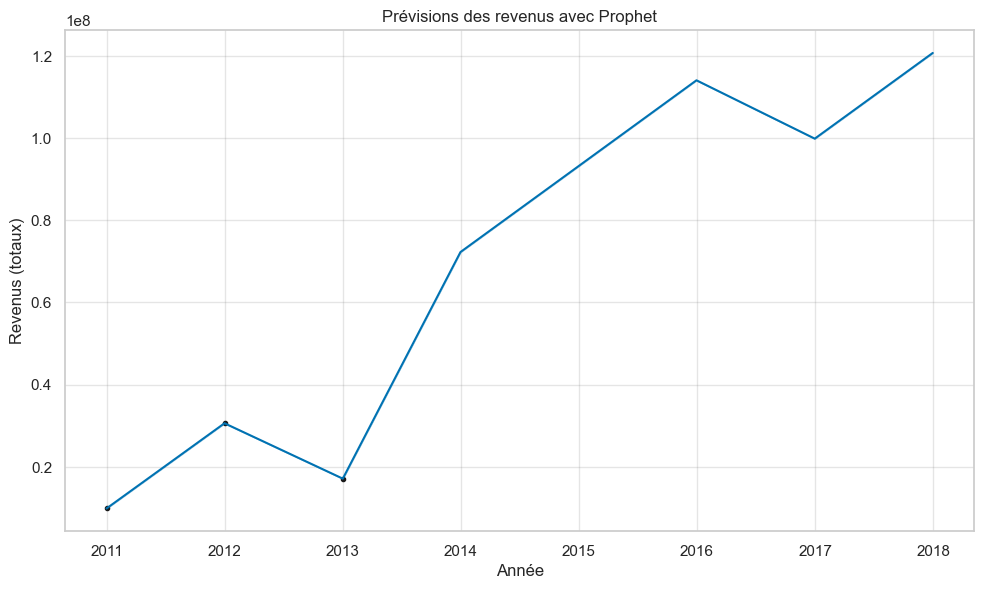

In [64]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Charger les données depuis le fichier Excel
file_path = r"C:\Users\PE\Desktop\machine learning\tesss4.xlsx"
data = pd.read_excel(file_path)

# Préparer les données : convertir les dates et vérifier la colonne Revenue
data['DATE'] = pd.to_datetime(data['DATE'])  # Convertir en datetime
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')  # Convertir en numérique
data.dropna(inplace=True)  # Supprimer les lignes avec des valeurs manquantes

# Agréger les revenus par année
data['Year'] = data['DATE'].dt.year  # Extraire l'année
annual_revenue = data.groupby('Year')['Revenue'].sum()  # Somme des revenus par année
annual_revenue.index = pd.to_datetime(annual_revenue.index, format='%Y')  # Convertir les années en datetime

# ---- Modèle Prophet ----
prophet_data = annual_revenue.reset_index()
prophet_data.columns = ['ds', 'y']

model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(prophet_data)

# Prévisions Prophet
future = model_prophet.make_future_dataframe(periods=5, freq='A')
forecast_prophet = model_prophet.predict(future)

# Ajouter les prévisions au DataFrame original
forecast_with_actuals = future.copy()
forecast_with_actuals['Predictions'] = forecast_prophet['yhat']

# Sauvegarder les résultats dans un nouveau fichier Excel
output_file_path = r"C:\Users\PE\Desktop\prophettt.xlsx"
forecast_with_actuals.to_excel(output_file_path, index=False)

# ---- Visualiser les prévisions Prophet ----
model_prophet.plot(forecast_prophet)
plt.title("Prévisions des revenus avec Prophet")
plt.xlabel("Année")
plt.ylabel("Revenus (totaux)")
plt.show()


## Analyse des Performances des Vendeurs 
Le code utilise la bibliothèque Prophet pour analyser et prédire les performances des vendeurs individuels en termes de revenus. Il vérifie et convertit les revenus au format numérique pour garantir leur intégrité. Les données sont ensuite regroupées par vendeur (SalePersonKey) et date (DATE), en calculant la somme des revenus pour chaque combinaison. Chaque groupe est préparé pour l'entraînement d'un modèle Prophet, qui prévoit les revenus pour chaque vendeur sur une période de deux ans.

Les résultats des prévisions sont combinés dans un seul DataFrame pour permettre des analyses globales, comme le calcul des revenus annuels prévus par vendeur. Les meilleurs vendeurs pour chaque année sont identifiés en fonction des revenus prévus, offrant une vue comparative des performances. Les résultats sont sauvegardés dans un fichier Excel, facilitant une analyse approfondie.

In [105]:
import pandas as pd
from prophet import Prophet

# Charger les données
data = pd.read_excel('C:\\Users\\PE\\Desktop\\machine learning\\tesss4.xlsx')

# Vérifier si la colonne 'Revenue' est bien au format numérique, sinon la convertir
if data['Revenue'].dtype == 'object':
    data['Revenue'] = data['Revenue'].str.replace(',', '').astype(float)

# Regrouper les données par SalePersonKey et DATE, puis sommer les revenus
salesperson_revenue = data.groupby(['SalePersonKey', 'DATE'])['Revenue'].sum().reset_index()

# Préparer les données pour Prophet
salesperson_revenue = salesperson_revenue.rename(columns={'DATE': 'ds', 'Revenue': 'y'})

# Créer un DataFrame pour stocker toutes les prédictions futures
future_predictions = pd.DataFrame()

# Liste des vendeurs uniques
sellers = salesperson_revenue['SalePersonKey'].unique()

# Prédictions pour chaque vendeur
for seller in sellers:
    # Filtrer les données pour le vendeur actuel
    seller_data = salesperson_revenue[salesperson_revenue['SalePersonKey'] == seller][['ds', 'y']]

    # Créer et entraîner le modèle Prophet
    model = Prophet()
    model.fit(seller_data)

    # Créer un DataFrame avec des dates futures pour la prédiction
    future = model.make_future_dataframe(periods=365 * 2)  # Prédire pour 2 ans
    forecast = model.predict(future)

    # Ajouter les prédictions au DataFrame des prédictions futures
    forecast['SalePersonKey'] = seller  # Ajouter l'identifiant du vendeur
    future_predictions = pd.concat([future_predictions, forecast[['ds', 'yhat', 'SalePersonKey']]])

# Ajouter une colonne pour l'année
future_predictions['year'] = pd.to_datetime(future_predictions['ds']).dt.year

# Calculer les revenus totaux prévus par vendeur et par année
predicted_revenues = future_predictions.groupby(['SalePersonKey', 'year'])['yhat'].sum().reset_index()

# Identifier les meilleurs vendeurs pour chaque année
top_sellers = predicted_revenues.sort_values(['year', 'yhat'], ascending=[True, False]).groupby('year').head(5)

# Afficher les résultats
print("Top vendeurs pour chaque année :")
print(top_sellers)

# Sauvegarder les résultats dans un fichier Excel
top_sellers.to_excel('top_sellers_predictions.xlsx', index=False)

print("Les prédictions des meilleurs vendeurs ont été sauvegardées dans le fichier 'top_sellers_predictions.xlsx'.")


18:18:07 - cmdstanpy - INFO - Chain [1] start processing
18:18:16 - cmdstanpy - INFO - Chain [1] done processing
18:18:17 - cmdstanpy - INFO - Chain [1] start processing
18:18:17 - cmdstanpy - INFO - Chain [1] done processing
18:18:17 - cmdstanpy - INFO - Chain [1] start processing
18:18:17 - cmdstanpy - INFO - Chain [1] done processing
18:18:18 - cmdstanpy - INFO - Chain [1] start processing
18:18:18 - cmdstanpy - INFO - Chain [1] done processing
18:18:18 - cmdstanpy - INFO - Chain [1] start processing
18:18:18 - cmdstanpy - INFO - Chain [1] done processing
18:18:19 - cmdstanpy - INFO - Chain [1] start processing
18:18:19 - cmdstanpy - INFO - Chain [1] done processing
18:18:19 - cmdstanpy - INFO - Chain [1] start processing
18:18:19 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1] done processing
18:18:20 - cmdstanpy - INFO - Chain [1] start processing
18:18:20 - cmdstanpy - INFO - Chain [1]

Top vendeurs pour chaque année :
    SalePersonKey  year          yhat
15              4  2011  1.728227e+06
25              6  2011  1.715208e+06
10              3  2011  1.370587e+06
40              9  2011  1.343798e+06
5               2  2011  1.187822e+06
16              4  2012  4.397926e+06
11              3  2012  4.233615e+06
64             15  2012  3.578935e+06
6               2  2012  3.446360e+06
26              6  2012  3.048211e+06
12              3  2013  1.491908e+08
37              8  2013  1.217946e+08
17              4  2013  9.303332e+07
7               2  2013  8.954918e+07
54             12  2013  8.175120e+07
55             12  2014  4.748248e+08
13              3  2014  2.567079e+08
8               2  2014  2.319476e+08
18              4  2014  2.136468e+08
62             14  2014  1.510440e+08
56             12  2015  3.898634e+08
9               2  2015  1.441360e+08
19              4  2015  1.225968e+08
14              3  2015  1.094199e+08
63             14

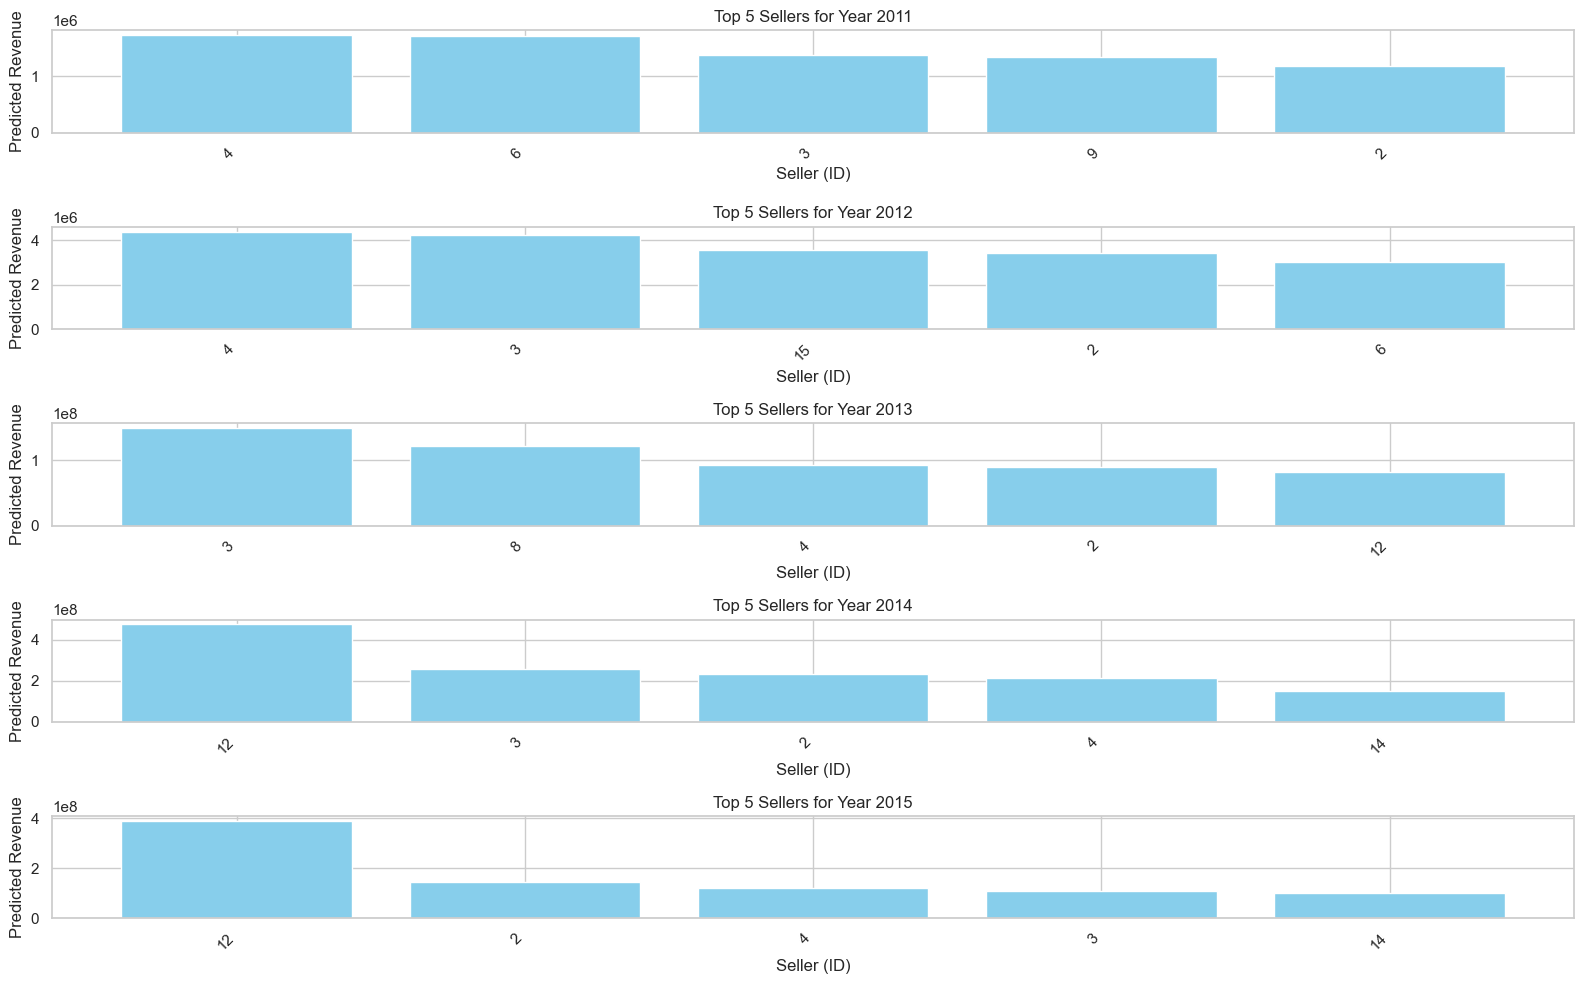

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Add a year column to the data
future_predictions['year'] = future_predictions['ds'].dt.year

# Group by year and SalePersonKey, then sum the total predicted revenue
sellers_by_year = future_predictions.groupby(['year', 'SalePersonKey'])['yhat'].sum().reset_index()

# Sort by year and revenue in descending order
sellers_by_year = sellers_by_year.sort_values(by=['year', 'yhat'], ascending=[True, False])

# Add a ranking column within each year
sellers_by_year['rank'] = sellers_by_year.groupby('year')['yhat'].rank(method='first', ascending=False)

# Filter for top 5 sellers per year
top_5_sellers_per_year = sellers_by_year[sellers_by_year['rank'] <= 5]

# Create a separate plot for each year
years = top_5_sellers_per_year['year'].unique()

plt.figure(figsize=(16, 10))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i+1)
    
    year_data = top_5_sellers_per_year[top_5_sellers_per_year['year'] == year]
    
    # Plotting the top 5 sellers for the given year
    plt.bar(year_data['SalePersonKey'].astype(str), year_data['yhat'], color='skyblue')
    
    plt.title(f"Top 5 Sellers for Year {year}")
    plt.xlabel("Seller (ID)")
    plt.ylabel("Predicted Revenue")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()



In [126]:
import pandas as pd

# Check the range of the 'DATE' column
print(future_predictions['ds'].min(), future_predictions['ds'].max())

# Filter and group by year as needed
future_predictions['year'] = future_predictions['ds'].dt.year

# Now, ensure the future_predictions dataframe includes data for 2011
sellers_by_year = future_predictions.groupby(['year', 'SalePersonKey'])['yhat'].sum().reset_index()

# Sorting by year and revenue
sellers_by_year = sellers_by_year.sort_values(by=['year', 'yhat'], ascending=[True, False])

# Add rank column for sellers per year
sellers_by_year['rank'] = sellers_by_year.groupby('year')['yhat'].rank(method='first', ascending=False)

# Filter for top 5 sellers per year
top_5_sellers_per_year = sellers_by_year[sellers_by_year['rank'] <= 5]

# Ensure that data includes year 2011 if it exists
top_5_sellers_per_year


2011-05-31 00:00:00 2015-06-30 00:00:00


,year,SalePersonKey,yhat,rank
3,2011,4,1.728227e+06,1.0
5,2011,6,1.715208e+06,2.0
2,2011,3,1.370587e+06,3.0
8,2011,9,1.343798e+06,4.0
1,2011,2,1.187822e+06,5.0
13,2012,4,4.397926e+06,1.0
12,2012,3,4.233615e+06,2.0
22,2012,15,3.578935e+06,3.0
11,2012,2,3.446360e+06,4.0
15,2012,6,3.048211e+06,5.0
